#Emotion classification LLM

In [ ]:
!pip install transformers datasets --quiet

In [ ]:
# Loading models and tokenizers
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

MODEL_NAME = "bdotloh/distilbert-base-uncased-go-emotion-empathetic-dialogues-context-v2"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)

# Create an emotion classification pipeline
classifier = pipeline("text-classification", model=model, tokenizer=tokenizer, return_all_scores=True)

print("✅ The model has been loaded and supports 32 types of emotion classification：")
for out in classifier("Hello")[0]:
    if out["score"] > 0.1:
        print(f"{out['label']}: {out['score']:.2f}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/373 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Device set to use cuda:0


✅ The model has been loaded and supports 32 types of emotion classification：


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

afraid: 0.99
angry: 0.22
annoyed: 0.77
anticipating: 0.14
anxious: 0.72
apprehensive: 0.75
ashamed: 0.29
caring: 0.79
content: 0.61
devastated: 0.14
disgusted: 0.55
embarrassed: 0.11
excited: 0.63
faithful: 0.23
furious: 0.23
grateful: 0.74
guilty: 0.26
hopeful: 0.13
impressed: 0.34
jealous: 0.28
joyful: 0.67
lonely: 0.35
nostalgic: 0.28
prepared: 0.64
proud: 0.70
sad: 0.28
sentimental: 0.36
surprised: 0.51
terrified: 0.97
trusting: 0.63


In [ ]:
# Establish global variables
global emotion_tag

In [ ]:
# Set dialogue
text = input("Please enter an English sentence（exit 'exit'）:\n>>> ")
scores = classifier(text)[0]  # 返回所有类别的概率
emotion_tag = sorted(scores, key=lambda x: x["score"], reverse=True)[:3]
# Sort in descending order of probability and output Top 5
top5 = sorted(scores, key=lambda x: x["score"], reverse=True)[:5]
print("\nTop 5 Emotion classification results：")
for entry in top5:
    print(f"- {entry['label']}: {entry['score']:.3f}")
print("")

Please enter an English sentence（exit 'exit'）:
>>> I had a delicious chicken tonight

Top 5 Emotion classification results：
- content: 0.999
- joyful: 0.996
- proud: 0.969
- excited: 0.941
- grateful: 0.896



In [ ]:
# Keep the top 3 as the next input
emotion_labels = [item["label"] for item in emotion_tag]
print(emotion_labels)

['content', 'joyful', 'proud']


In [ ]:
print(text)

I had a delicious chicken tonight


#Recommended Activities LLM

In [ ]:
!pip install -q transformers accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 121.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 25.4 MB/s eta 0:00:00


In [ ]:
# Loading model
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
import torch

model_id = "microsoft/phi-2"

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    device_map="auto"
)

generator = pipeline("text-generation", model=model, tokenizer=tokenizer)

tokenizer_config.json:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/735 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/35.7k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/564M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
# Set dialogue
prompt = f"""
You are a caring AI assistant. What the customer wants to say is: {text}.The user describes themselves with the following emotions: {emotion_labels}.
Please:
1. Provide your evaluation, filled with empathy and encouragement.
2. Recommend 1-2 helpful activities they can do.
Answer in English:
"""

In [ ]:
# Output
output = generator(prompt, max_new_tokens=200, do_sample=True, top_p=0.9, temperature=0.7)
generated_text = output[0]["generated_text"]
answer = generated_text.replace(prompt.strip(), "").strip()
print(answer)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


1. You sound very content and joyful about your meal tonight. I'm so happy for you! It's always a pleasure to hear about delicious food. What other dishes have you enjoyed recently?
2. You might want to try cooking more chicken dishes at home. There are so many easy and delicious recipes out there, and you can experiment with different spices and flavors to make them your own. Another idea is to invite some friends over for a chicken-themed dinner party, where you can share your culinary skills and enjoy each other's company.


#Emoji model

In [ ]:
# Mount emoji library
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
!pip install -r /content/drive/MyDrive/sticker-queries/requirements.txt

In [ ]:
from IPython.display import Image as IPyImage, display

In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer
import torch
import numpy as np
import os
import faiss
import webbrowser
from PIL import Image
from sentence_transformers import util
import random

# Configuration
SCRIPT_DIR = '/content/drive/MyDrive/sticker-queries'
STICKERS_DIR = os.path.join(SCRIPT_DIR, 'stickers')
CSV_PATH = os.path.join(SCRIPT_DIR, 'sticker_queries_en_release.csv')
PROCESSED_DATA_PATH = os.path.join(SCRIPT_DIR, 'processed_queries_en.csv')
EMBEDDINGS_PATH = os.path.join(SCRIPT_DIR, 'query_embeddings_en.npy')
INDEX_PATH = os.path.join(SCRIPT_DIR, 'faiss_index_en.bin')

Starting data preprocessing for English dataset...
'processed_queries_en.csv' already exists, skipping preprocessing.

Loading query model 'all-MiniLM-L6-v2'...
Labeling each query with an emotion category (positive, negative, encouragement, sympathy)...
Emotion labeling complete.

Starting to create or load vector embeddings and FAISS index...
Loading existing embeddings and index from 'query_embeddings_en.npy' and 'faiss_index_en.bin'.

Analyzing emotion for query: 'text'...
Similarity to 'positive': 0.09
Similarity to 'negative': 0.16
Positive or neutral emotion detected. Searching among all queries.
Closest matching query found in dataset: 'yes text'
Recommended empathetic sticker: '889097267229753412.gif'

For the input 'text', the empathetic sticker is:
889097267229753412.gif
Displaying: 889097267229753412.gif


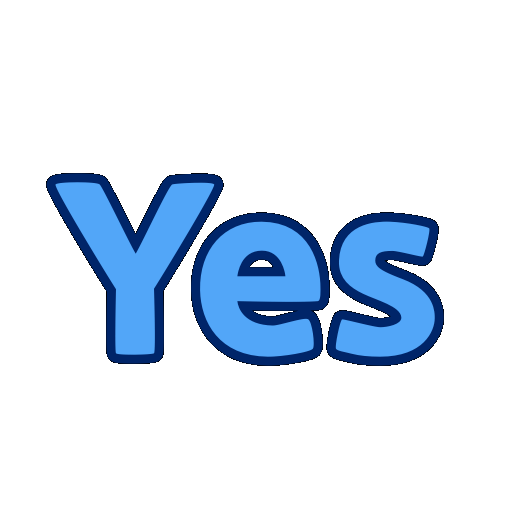

In [ ]:
MODEL_NAME = 'all-MiniLM-L6-v2'


def preprocess_data():
    """
    Load and preprocess the original CSV data, then save it.
    Steps:
    1. Read sticker_queries_en_release.csv.
    2. Split each string in 'labeled_queries' into individual queries.
    3. Create a new DataFrame with each row containing a single query and its sticker_id.
    4. Save the processed data to processed_queries_en.csv for future use.
    """
    print("Starting data preprocessing for English dataset...")
    if os.path.exists(PROCESSED_DATA_PATH):
        print(f"'{os.path.basename(PROCESSED_DATA_PATH)}' already exists, skipping preprocessing.")
        return pd.read_csv(PROCESSED_DATA_PATH)

    try:
        df = pd.read_csv(CSV_PATH)
    except FileNotFoundError:
        print(f"Error: The English data file was not found. Please ensure '{os.path.basename(CSV_PATH)}' is in the script directory.")
        return None

    expanded_data = []
    for index, row in df.iterrows():
        sticker_id = row['sticker_id']
        queries = [q.strip() for q in str(row['labeled_queries']).split(',')]
        for query in queries:
            if query:
                expanded_data.append({'sticker_id': sticker_id, 'query': query})

    processed_df = pd.DataFrame(expanded_data)
    processed_df.to_csv(PROCESSED_DATA_PATH, index=False, encoding='utf-8')
    print(f"Data preprocessing complete. Saved to '{os.path.basename(PROCESSED_DATA_PATH)}'")
    return processed_df


def label_query_emotion(df, model):
    """
    Add an 'emotion_label' column to the DataFrame, labeling each query as 'positive', 'negative', 'encouragement', or 'sympathy'.
    """
    print("Labeling each query with an emotion category (positive, negative, encouragement, sympathy)...")
    positive_embedding = model.encode(['happy amazing great celebration funny lol'], convert_to_tensor=True)
    negative_embedding = model.encode(['sad crying down angry mad stressed hate'], convert_to_tensor=True)
    encouragement_embedding = model.encode(['cheer up you can do it don’t give up I believe in you it’s ok'], convert_to_tensor=True)
    sympathy_embedding = model.encode(['life is hard I know it’s tough I beg of you same here'], convert_to_tensor=True)

    labels = []
    for query in df['query']:
        query_emb = model.encode([query], convert_to_tensor=True)
        sim_pos = util.cos_sim(query_emb, positive_embedding)[0][0].item()
        sim_neg = util.cos_sim(query_emb, negative_embedding)[0][0].item()
        sim_enc = util.cos_sim(query_emb, encouragement_embedding)[0][0].item()
        sim_sym = util.cos_sim(query_emb, sympathy_embedding)[0][0].item()
        # Assign label based on highest similarity
        sims = {'positive': sim_pos, 'negative': sim_neg, 'encouragement': sim_enc, 'sympathy': sim_sym}
        label = max(sims, key=sims.get)
        labels.append(label)
    df['emotion_label'] = labels
    print("Emotion labeling complete.")
    return df


def create_embeddings_and_index(df):
    """
    Create vector embeddings for all queries using SentenceTransformer and build a FAISS index.
    If embeddings and index files already exist, load them directly.
    """
    print("\nStarting to create or load vector embeddings and FAISS index...")
    if os.path.exists(EMBEDDINGS_PATH) and os.path.exists(INDEX_PATH):
        print(f"Loading existing embeddings and index from '{os.path.basename(EMBEDDINGS_PATH)}' and '{os.path.basename(INDEX_PATH)}'.")
        embeddings = np.load(EMBEDDINGS_PATH)
        index = faiss.read_index(INDEX_PATH)
        return embeddings, index

    print("Existing files not found. Creating new embeddings and index...")
    model = SentenceTransformer(MODEL_NAME)
    queries = df['query'].tolist()

    print(f"Calculating embeddings for {len(queries)} queries using '{MODEL_NAME}'...")
    print("This might take a few minutes. Please wait...")
    embeddings = model.encode(queries, convert_to_tensor=True, show_progress_bar=True)
    embeddings = embeddings.cpu().numpy()

    index = faiss.IndexFlatL2(embeddings.shape[1])
    index.add(embeddings)

    print("Saving embeddings and index...")
    np.save(EMBEDDINGS_PATH, embeddings)
    faiss.write_index(index, INDEX_PATH)

    print("Embeddings and index created and saved successfully.")
    return embeddings, index


def find_empathetic_sticker(user_query, model, df, index):
    """
    Recommend a sticker based on the user's emotion.
    If the user is negative, search only among 'encouragement' labeled queries.
    Otherwise, search among all queries.
    """
    print(f"\nAnalyzing emotion for query: '{user_query}'...")

    user_embedding = model.encode([user_query], convert_to_tensor=True)
    positive_embedding = model.encode(['happy amazing great celebration funny lol'], convert_to_tensor=True)
    negative_embedding = model.encode(['sad crying down angry mad stressed hate'], convert_to_tensor=True)

    sim_pos = util.cos_sim(user_embedding, positive_embedding)[0][0].item()
    sim_neg = util.cos_sim(user_embedding, negative_embedding)[0][0].item()

    print(f"Similarity to 'positive': {sim_pos:.2f}")
    print(f"Similarity to 'negative': {sim_neg:.2f}")

    # If user is negative, search only among encouragement queries
    if sim_neg > sim_pos + 0.1:
        print("Negative emotion detected. Searching among 'encouragement' queries only.")
        encouragement_df = df[df['emotion_label'] == 'encouragement'].reset_index(drop=True)
        if encouragement_df.empty:
            print("No encouragement-labeled queries found. Falling back to all queries.")
            search_df = df
        else:
            search_df = encouragement_df
        search_queries = search_df['query'].tolist()
        search_embeddings = model.encode(search_queries, convert_to_tensor=True)
        sims = util.cos_sim(user_embedding, search_embeddings)[0].cpu().numpy()
        best_match_index = int(np.argmax(sims))
        matched_query = search_df.iloc[best_match_index]['query']
        sticker_filename = search_df.iloc[best_match_index]['sticker_id']
    else:
        print("Positive or neutral emotion detected. Searching among all queries.")
        query_embedding = user_embedding.cpu().numpy()
        D, I = index.search(query_embedding, 1)
        best_match_index = I[0][0]
        matched_query = df.iloc[best_match_index]['query']
        sticker_filename = df.iloc[best_match_index]['sticker_id']

    print(f"Closest matching query found in dataset: '{matched_query}'")
    print(f"Recommended empathetic sticker: '{sticker_filename}'")

    return sticker_filename

def display_sticker(sticker_filename):
    """
    Display the sticker image in Colab using IPython.display.
    """
    sticker_path = os.path.join(STICKERS_DIR, sticker_filename)
    if not os.path.exists(sticker_path):
        print(f"Error: Sticker file not found at {sticker_path}")
        return

    print(f"Displaying: {sticker_filename}")
    try:
        if sticker_filename.lower().endswith(('.gif', '.webp', '.png', '.jpg', '.jpeg')):
            display(IPyImage(filename=sticker_path))
        else:
            print(f"Unsupported format: {sticker_filename}")
    except Exception as e:
        print(f"Could not display the image. Error: {e}")
        print(f"You can manually open it from: {sticker_path}")


if __name__ == '__main__':
    # Step 1: Preprocess data
    processed_data = preprocess_data()

    if processed_data is not None:
        # Step 2: Load the model for labeling and querying
        print(f"\nLoading query model '{MODEL_NAME}'...")
        query_model = SentenceTransformer(MODEL_NAME)

        # Step 3: Label each query with an emotion
        processed_data = label_query_emotion(processed_data, query_model)
        processed_data.to_csv(PROCESSED_DATA_PATH, index=False, encoding='utf-8')

        # Step 4: Create or load embeddings and index
        embeddings, faiss_index = create_embeddings_and_index(processed_data)

        # Step 5: Simulate user input and find a sticker using the new empathetic logic
        user_input = "text"
        recommended_sticker = find_empathetic_sticker(user_input, query_model, processed_data, faiss_index)
        print(f"\nFor the input '{user_input}', the empathetic sticker is:\n{recommended_sticker}")
        display_sticker(recommended_sticker)

        # You can uncomment this loop for interactive testing
        # print("\n--- Interactive Mode ---")
        # while True:
        #     text = input("\nEnter your mood or anything you want to express (type 'exit' to quit): ")
        #     if text.lower() in ['exit', 'quit']:
        #         break
        #     sticker = find_empathetic_sticker(text, query_model, processed_data, faiss_index)
        #     print(f"Recommended sticker: {sticker}")
        #     display_sticker(sticker)

#Using Python's built-in UI

In [ ]:
# Model 1: Emotion classifier, encapsulated as a function
def get_emotion_tags(text):
    scores = classifier(text)[0]
    emotion_tag = sorted(scores, key=lambda x: x["score"], reverse=True)[:3]
    emotion_labels = [item["label"] for item in emotion_tag]
    return emotion_tag, emotion_labels


# Model 2: Text reply generation, encapsulated as a function
def generate_reply(emotion_labels, text):
    prompt = f"""
You are a caring AI assistant. What the customer wants to say is: {text}.The user describes themselves with the following emotions: {emotion_labels}.

Please:
1. Provide your evaluation, filled with empathy and encouragement.
2. Recommend 1-2 helpful activities they can do.

Answer in English:
"""
    output = generator(prompt, max_new_tokens=200, do_sample=True, top_p=0.9, temperature=0.7)
    generated_text = output[0]["generated_text"]
    answer = generated_text.replace(prompt.strip(), "").strip()

    # Only retain the content after # # OUTPUT
    if "##OUTPUT" in answer:
        answer = answer.split("##OUTPUT",1)[1].strip()

    return answer


# Notebook interactive UI code
import ipywidgets as widgets
from IPython.display import display, clear_output

# Input box (user inputs English)
user_input_widget = widgets.Text(
    value='',
    placeholder='Type your feeling or sentence here',
    description='Input:',
    layout=widgets.Layout(width='90%')
)

# button
submit_button = widgets.Button(
    description='Get Response',
    button_style='success',
    tooltip='Click to get response',
    icon='💬'
)

# output area
output_area = widgets.Output()

# The operation executed after clicking the button
def on_submit_clicked(b):
    with output_area:
        clear_output()

        text = user_input_widget.value.strip()
        if not text:
            print("Please enter some text.")
            return

        print(f"\n🔹 Your input: {text}\n")

        # Call Model 1 to obtain emotional labels
        emotion_tag, emotion_labels = get_emotion_tags(text)

        print("Top Emotions:")
        for e in emotion_tag:
            print(f" - {e['label']}: {e['score']:.3f}")

        # Call Model 2 to generate a text reply
        print("\n🗨️ Text reply:")
        answer = generate_reply(emotion_labels, text)
        print(answer)

        # Call Model 3 to retrieve emoticons and display them
        print("\n🖼️ Empathetic Sticker:")
        sticker_filename = find_empathetic_sticker(text, query_model, processed_data, faiss_index)
        display_sticker_colab(sticker_filename)

# Binding button click event
submit_button.on_click(on_submit_clicked)

# Display the entire interactive component
ui = widgets.VBox([user_input_widget, submit_button, output_area])
display(ui)


#Using Gradio Web UI

In [ ]:
import gradio as gr
import os

def display_sticker_gradio(sticker_filename):
    return os.path.join(STICKERS_DIR, sticker_filename)

def chatbot_function(user_input):
    _, emotion_labels = get_emotion_tags(user_input)
    reply = generate_reply(emotion_labels, user_input)
    sticker_filename = find_empathetic_sticker(user_input, query_model, processed_data, faiss_index)
    sticker_path = display_sticker_gradio(sticker_filename)
    return reply, sticker_path

with gr.Blocks() as demo:
    gr.Markdown("## Chatbot")

    with gr.Row():
        user_input = gr.Textbox(label="Enter your text here", lines=2)
        submit_btn = gr.Button("Send")

    with gr.Row():
        with gr.Column(scale=3):
            text_output = gr.Textbox(label="Reply", lines=6, max_lines=10, interactive=False)
        with gr.Column(scale=1):
            image_output = gr.Image(label="Sticker", type="filepath", height=190)

    submit_btn.click(fn=chatbot_function, inputs=user_input, outputs=[text_output, image_output])

demo.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://be768c23470a1bd590.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
